In [1]:
import pandas as pd
import re

In [2]:
# Load Reading Girls Data
df = pd.read_csv("data/SessionPlaytestResults.csv")

original_before_words = []
for a in pd.concat([df['Being a scientist means....Pre'+str(i)] for i in range(1,6)]).fillna(''):
    original_before_words = original_before_words + a.split()
    
original_before_words = [x.lower() for x in original_before_words] 

original_after_words = []
for a in pd.concat([df['Being a scientist means....Post'+str(i)] for i in range(1,6)]).fillna(''):
    original_after_words = original_after_words + a.split()

original_before_words = [re.sub(r'[^\w\s]', '', x.lower()) for x in original_before_words]
original_after_words = [re.sub(r'[^\w\s]', '', x.lower()) for x in original_after_words]

In [3]:
# Load Reading Girls Data
df = pd.read_csv("data/RGS_raw_feedback.csv")

rgs_before_words = []
for a in df['Being a scientist means? Before'].fillna(''):
    rgs_before_words = rgs_before_words + a.split()
    
rgs_before_words = [x.lower() for x in rgs_before_words] 

rgs_after_words = []
for a in df['Being a scientist means? After'].fillna(''):
    rgs_after_words = rgs_after_words + a.split()

rgs_before_words = [re.sub(r'[^\w\s]', '', x.lower()) for x in rgs_before_words]
rgs_after_words = [re.sub(r'[^\w\s]', '', x.lower()) for x in rgs_after_words]

In [4]:
# Load Print and play data
df = pd.read_csv("data/Questionaire_Responces.csv")

pnp_before_words = []
for a in df['Q5'].fillna(''):
    pnp_before_words = pnp_before_words + a.split()

pnp_before_words = [re.sub(r'[^\w\s]', '', x.lower()) for x in pnp_before_words]

In [6]:
# Load Social Mobility Foundation Foundation
df = pd.read_csv("data/BoardgamePPSMF.csv")

smf_before_words = []
for a in df['Claire Edited -Tiny Edits'].fillna(''):
    smf_before_words = smf_before_words + a.split()

smf_before_words = [re.sub(r'[^\w\s]', '', x.lower()) for x in smf_before_words]

In [7]:
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")

In [8]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np

x, y = np.ogrid[:3000, :3000]

mask = (x - 1500) ** 2 + (y - 1500) ** 2 > 1300 ** 2
mask = 255 * mask.astype(int)
mask = mask[::2,:]

wordcloud = WordCloud(width=3000,
                    height=2000,
                    random_state=1, 
                    background_color='white',
                    mask=mask,
                    colormap='viridis', 
                    collocations=False, 
                    stopwords=STOPWORDS)

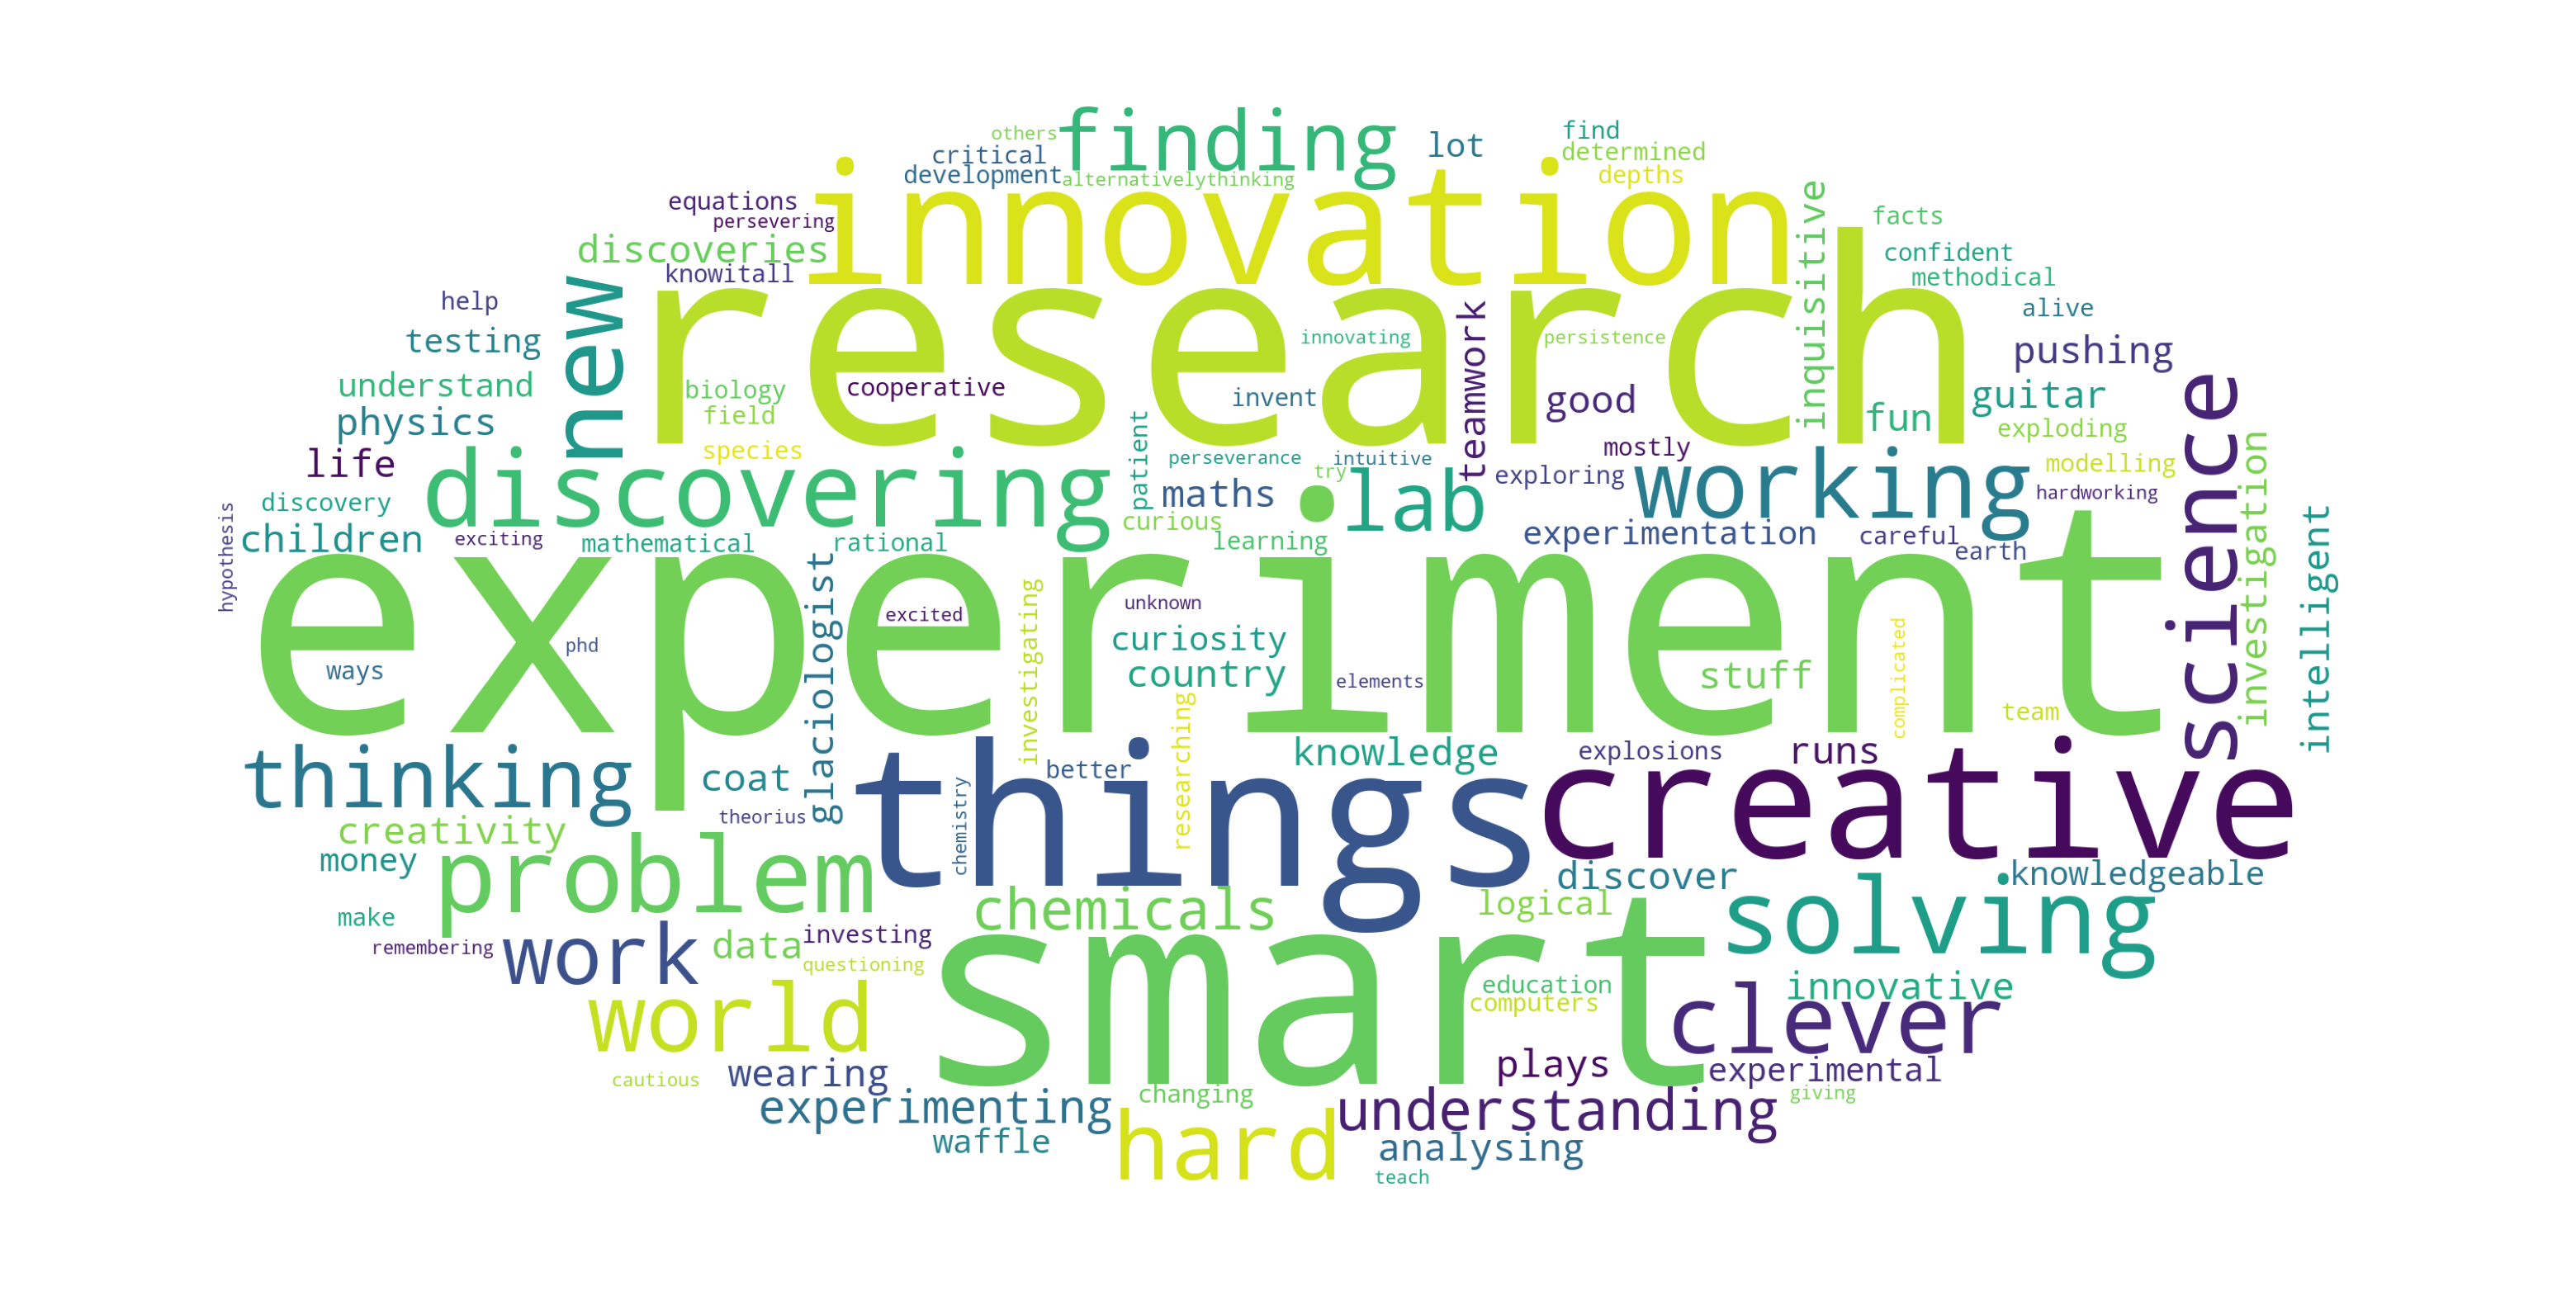

In [9]:
wordcloud.generate(' '.join(original_before_words))

plot_cloud(wordcloud)

wordcloud.to_file("figures/original_words_before.png")

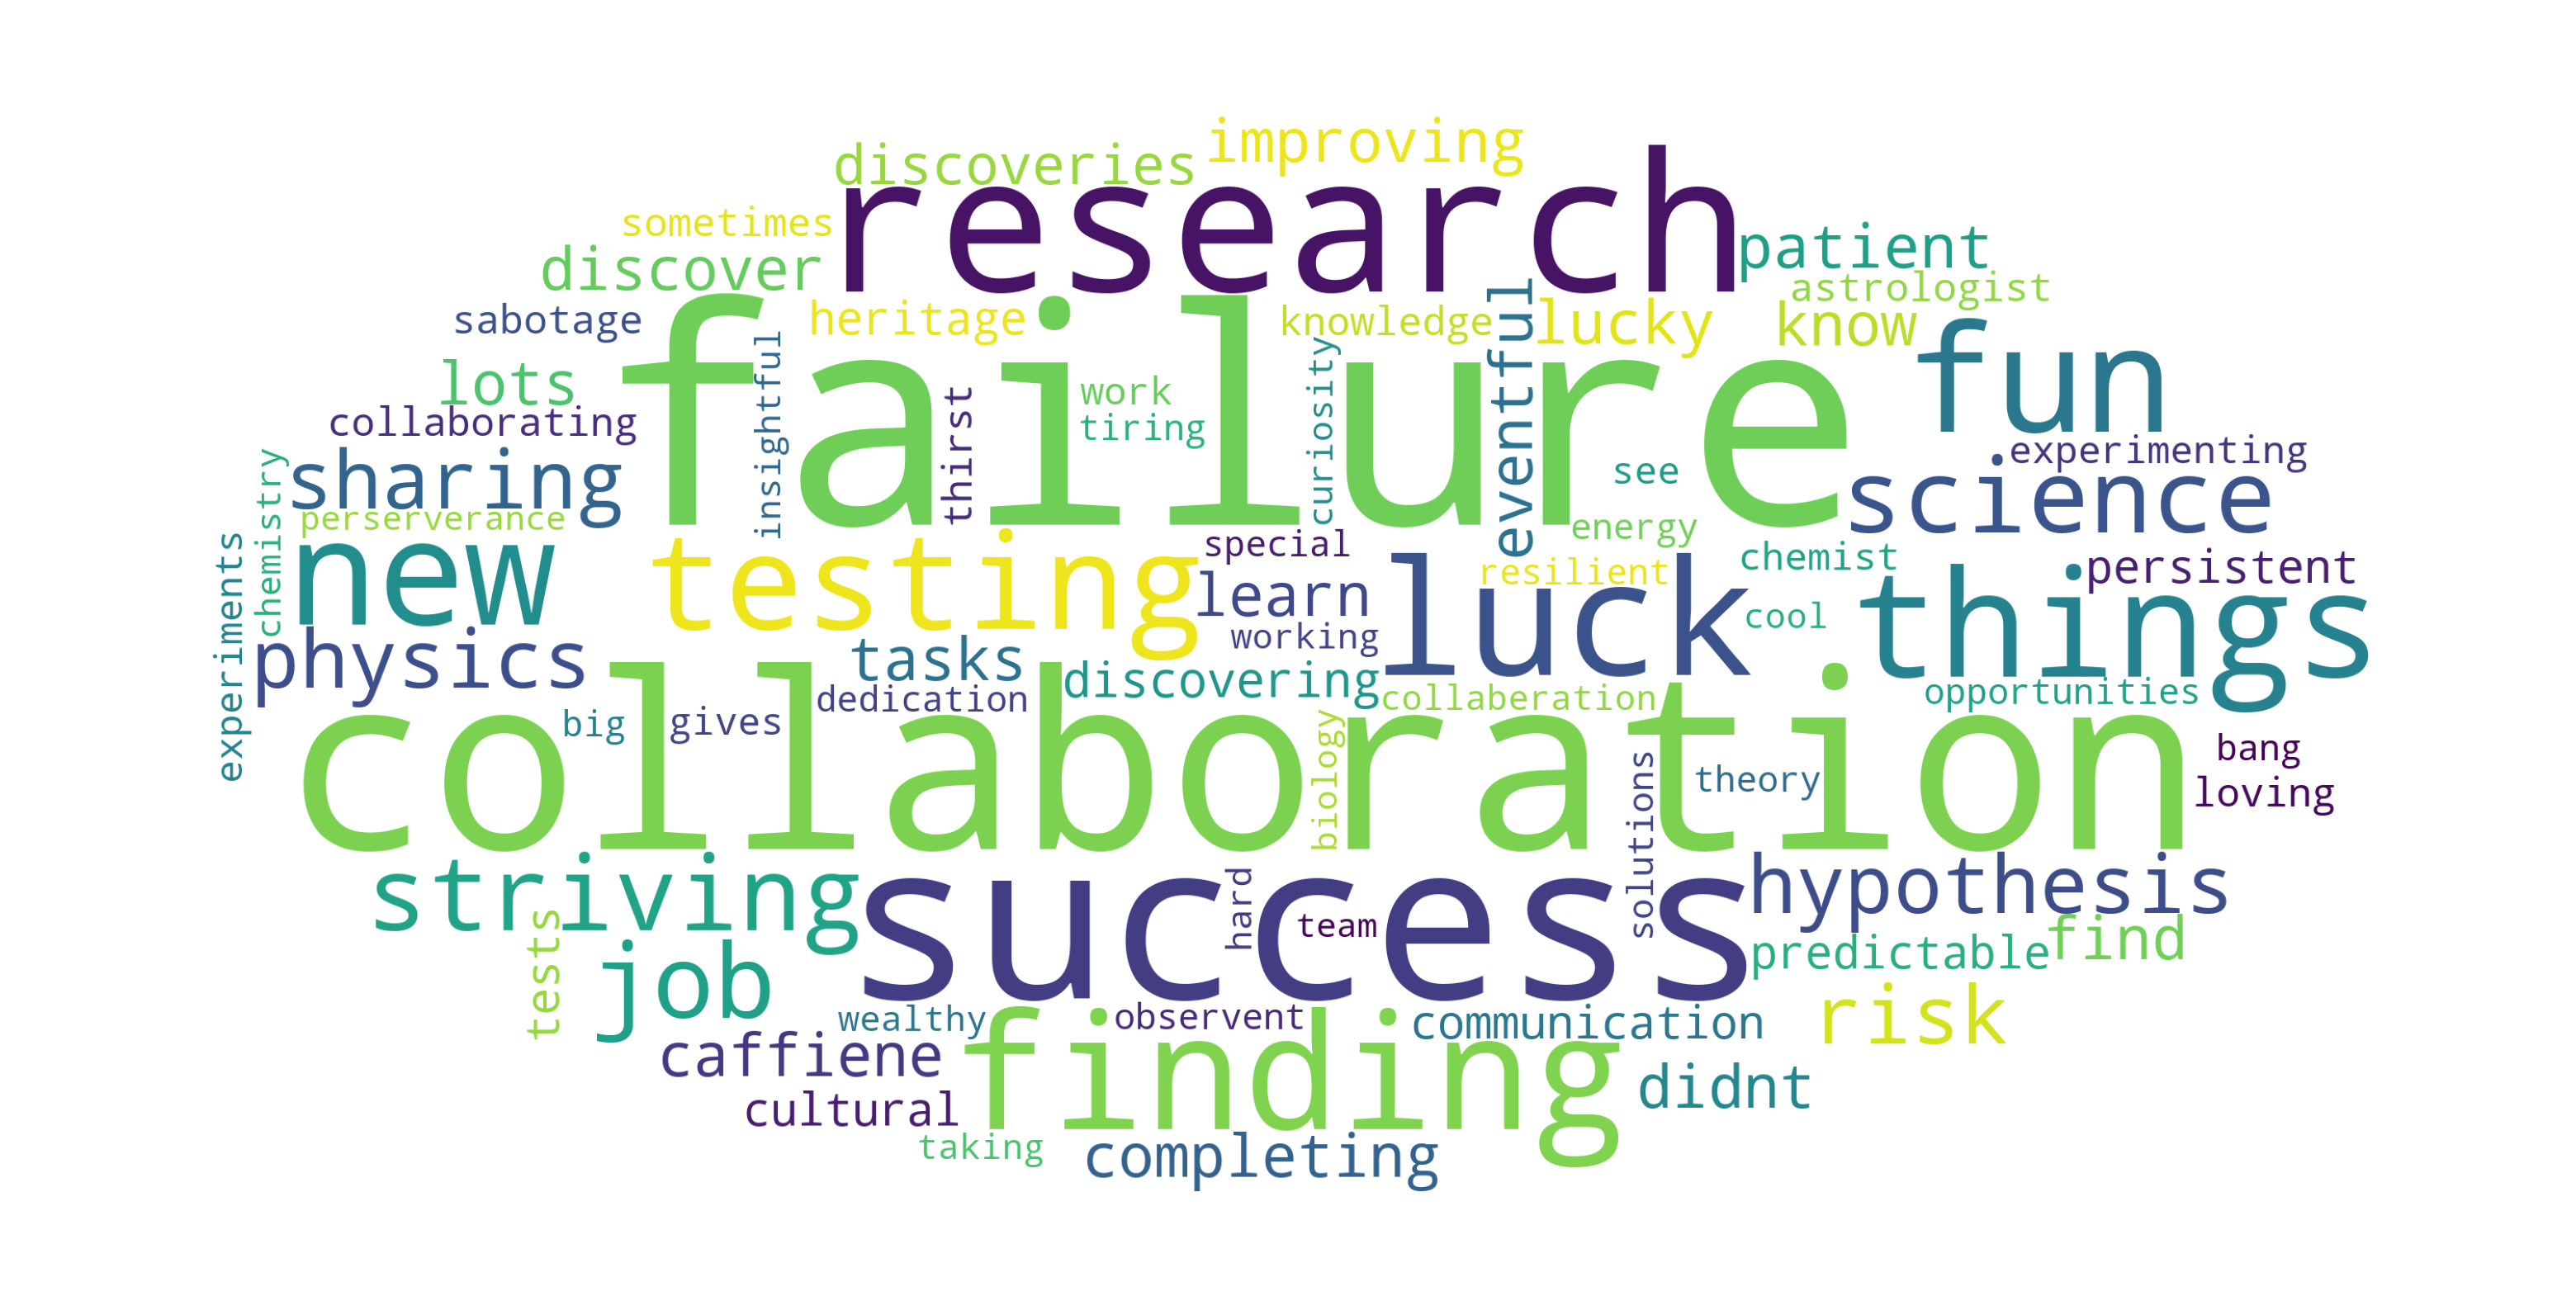

In [10]:
wordcloud.generate(' '.join(original_after_words))

plot_cloud(wordcloud)

wordcloud.to_file("figures/original_words_after.png")

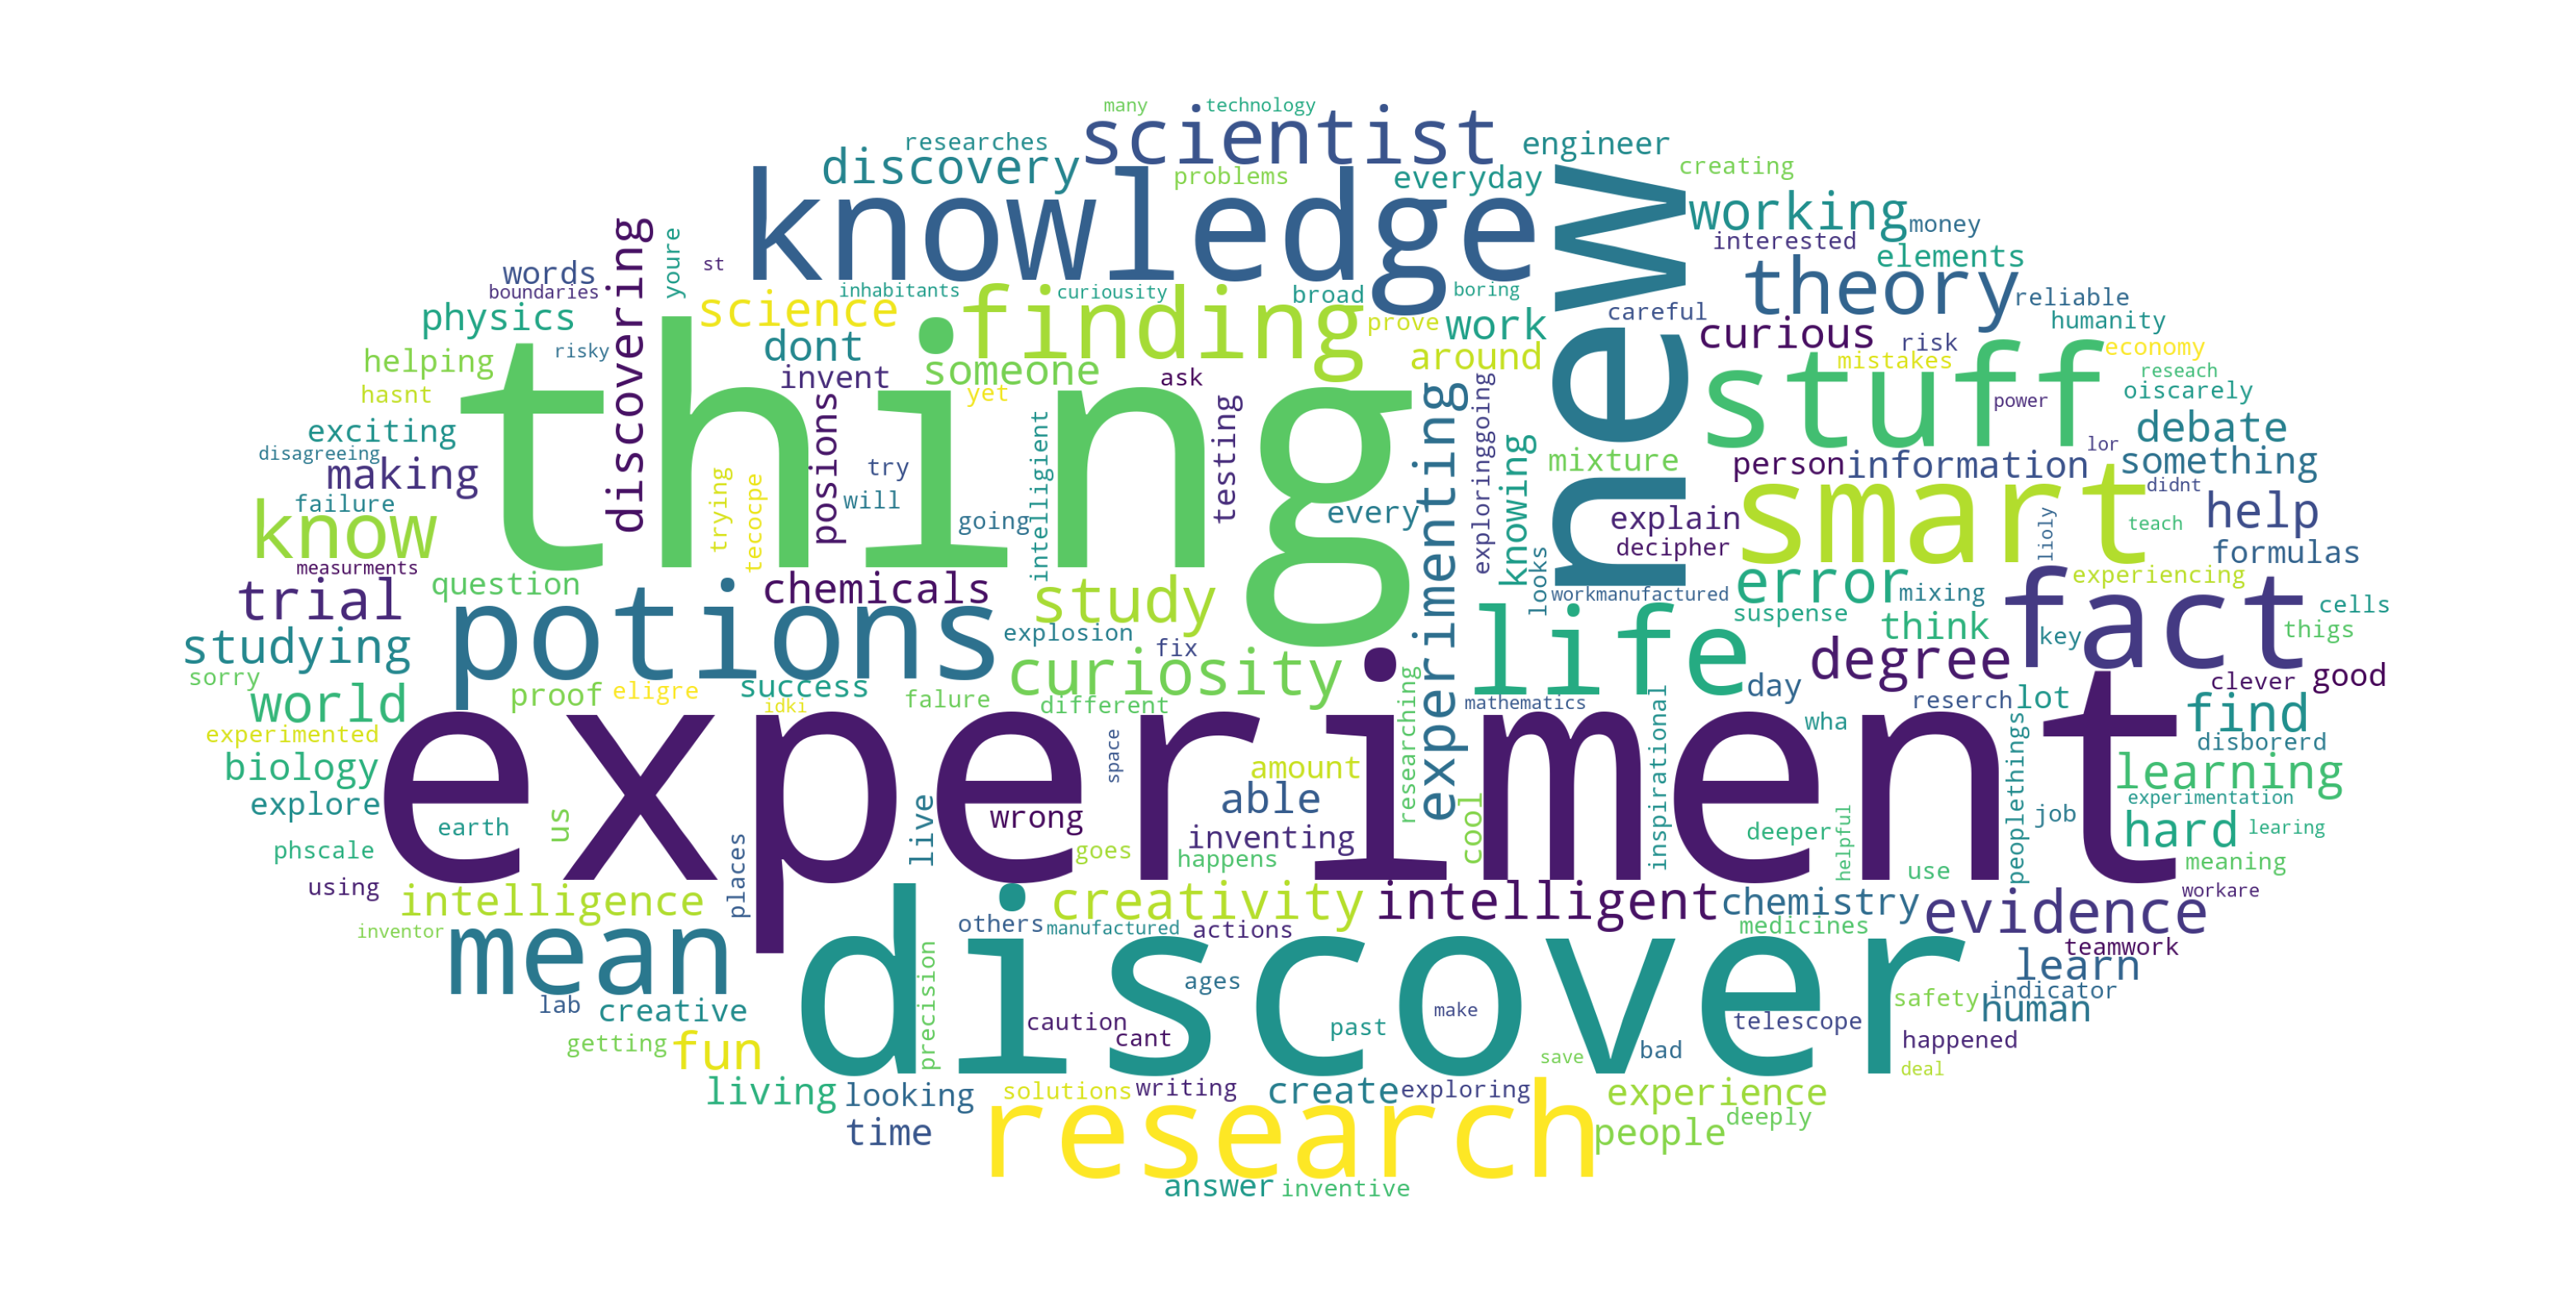

In [11]:
wordcloud.generate(' '.join(rgs_before_words))

plot_cloud(wordcloud)

wordcloud.to_file("figures/rgs_words_before.png")

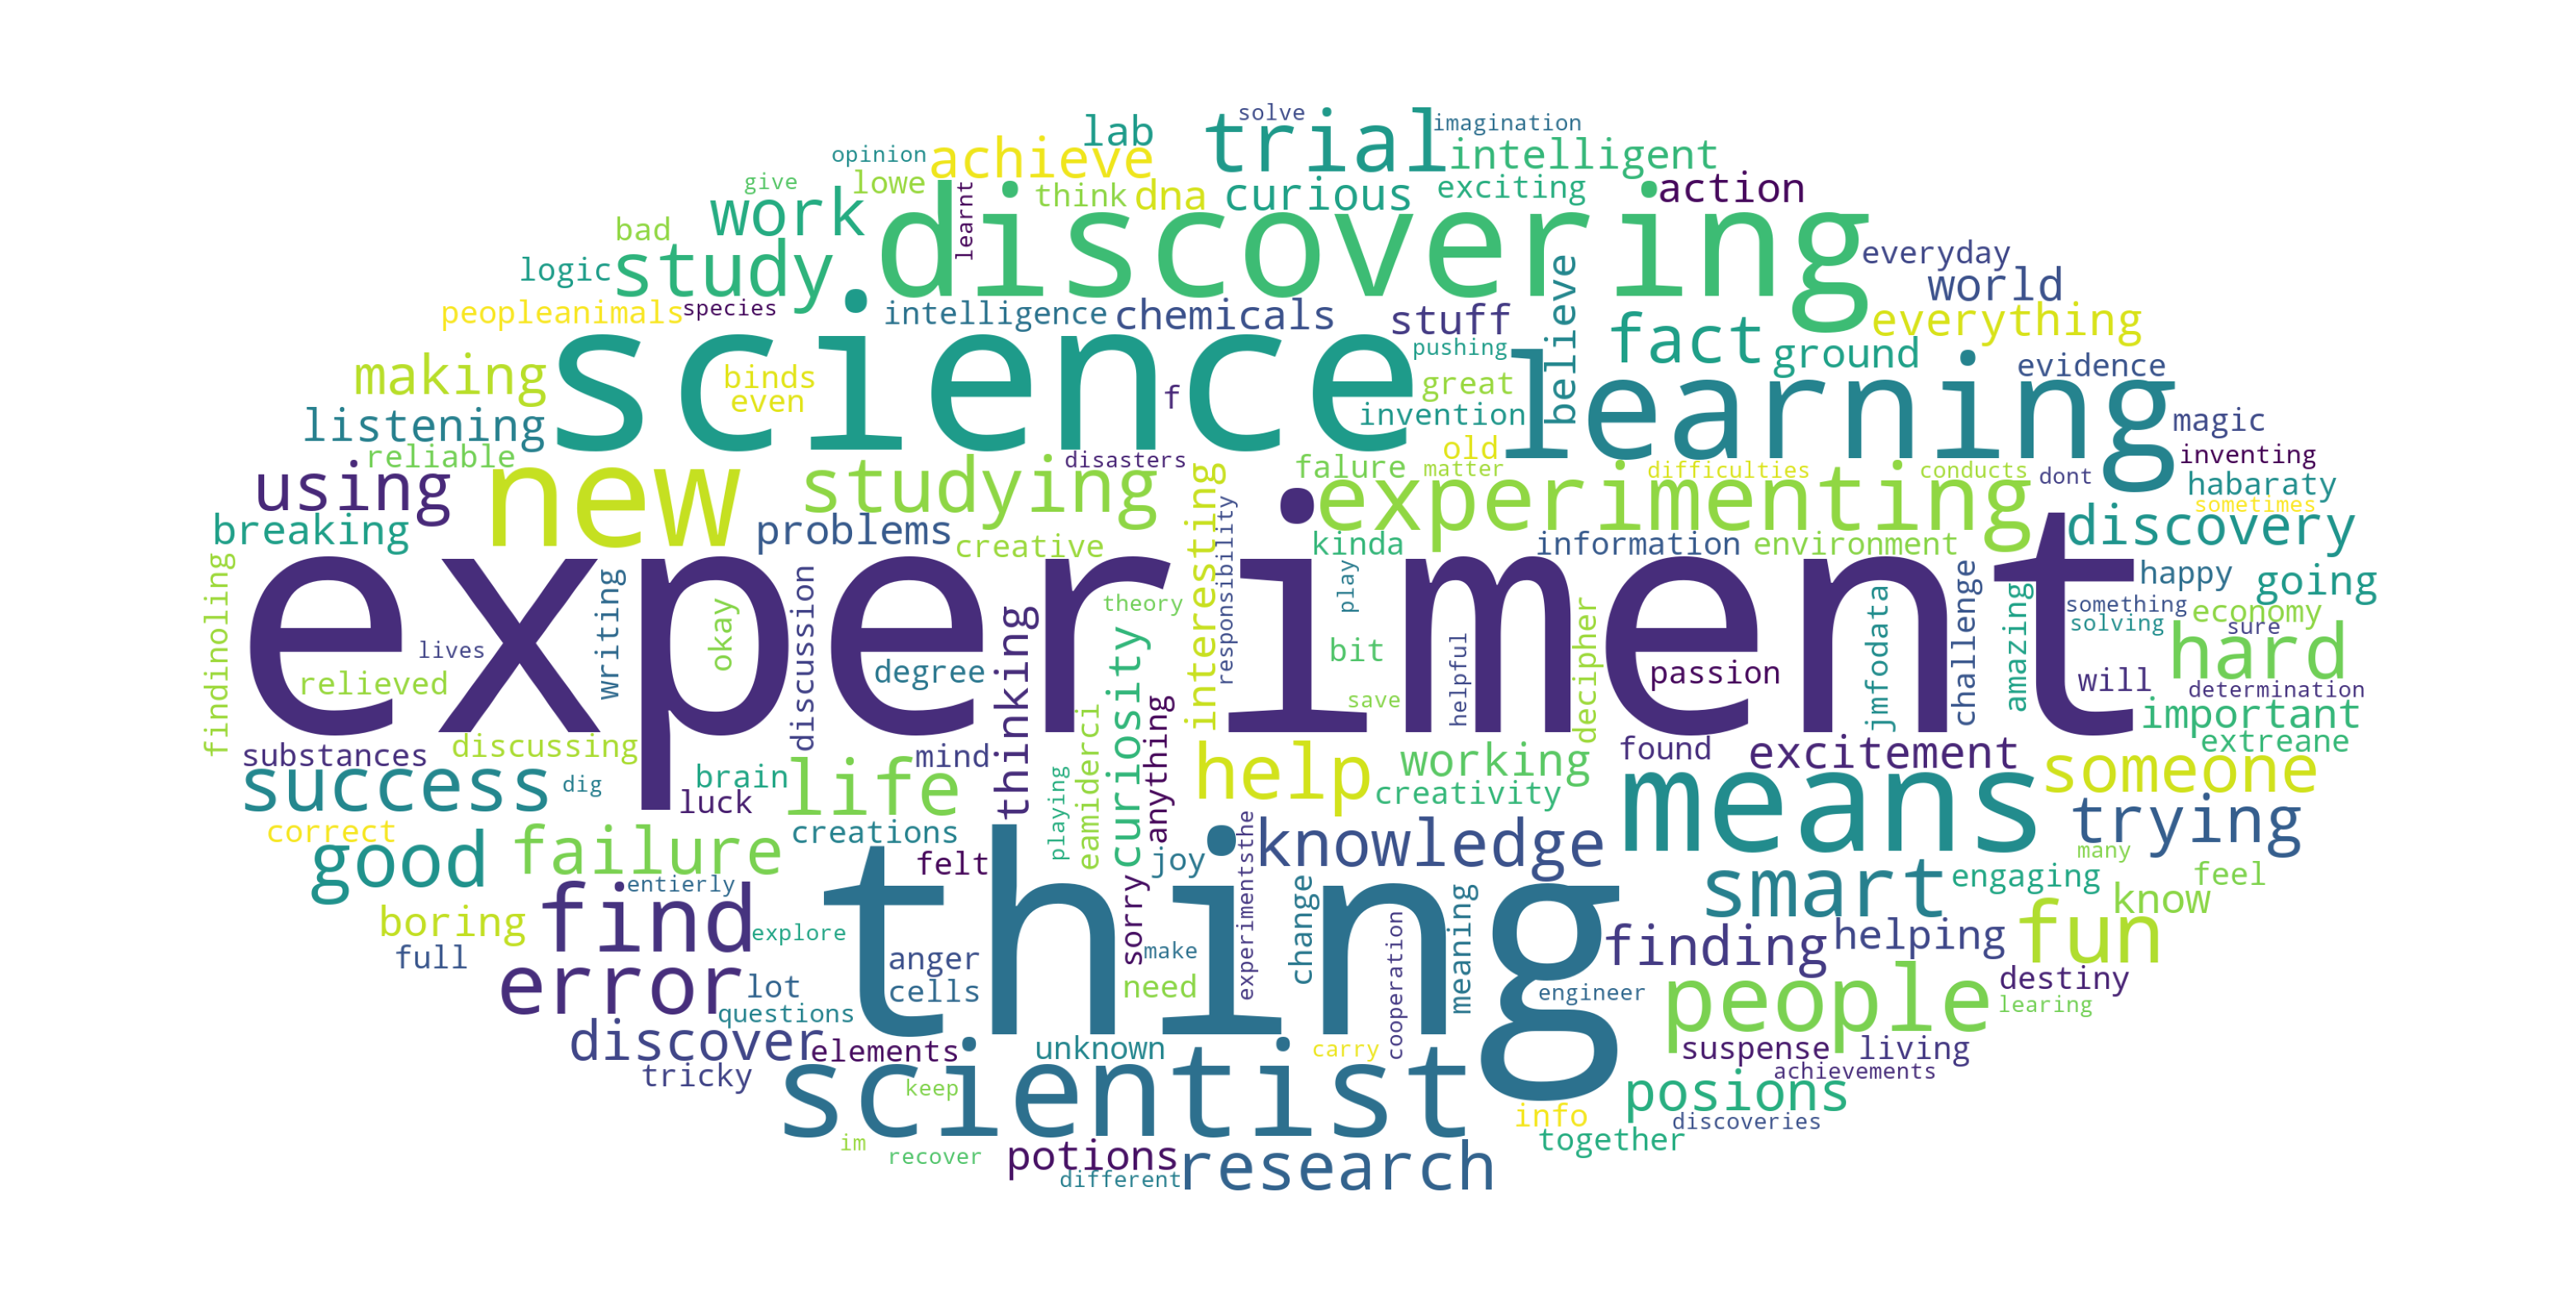

In [12]:
wordcloud.generate(' '.join(rgs_after_words))

plot_cloud(wordcloud)

wordcloud.to_file("figures/rgs_words_after.png")

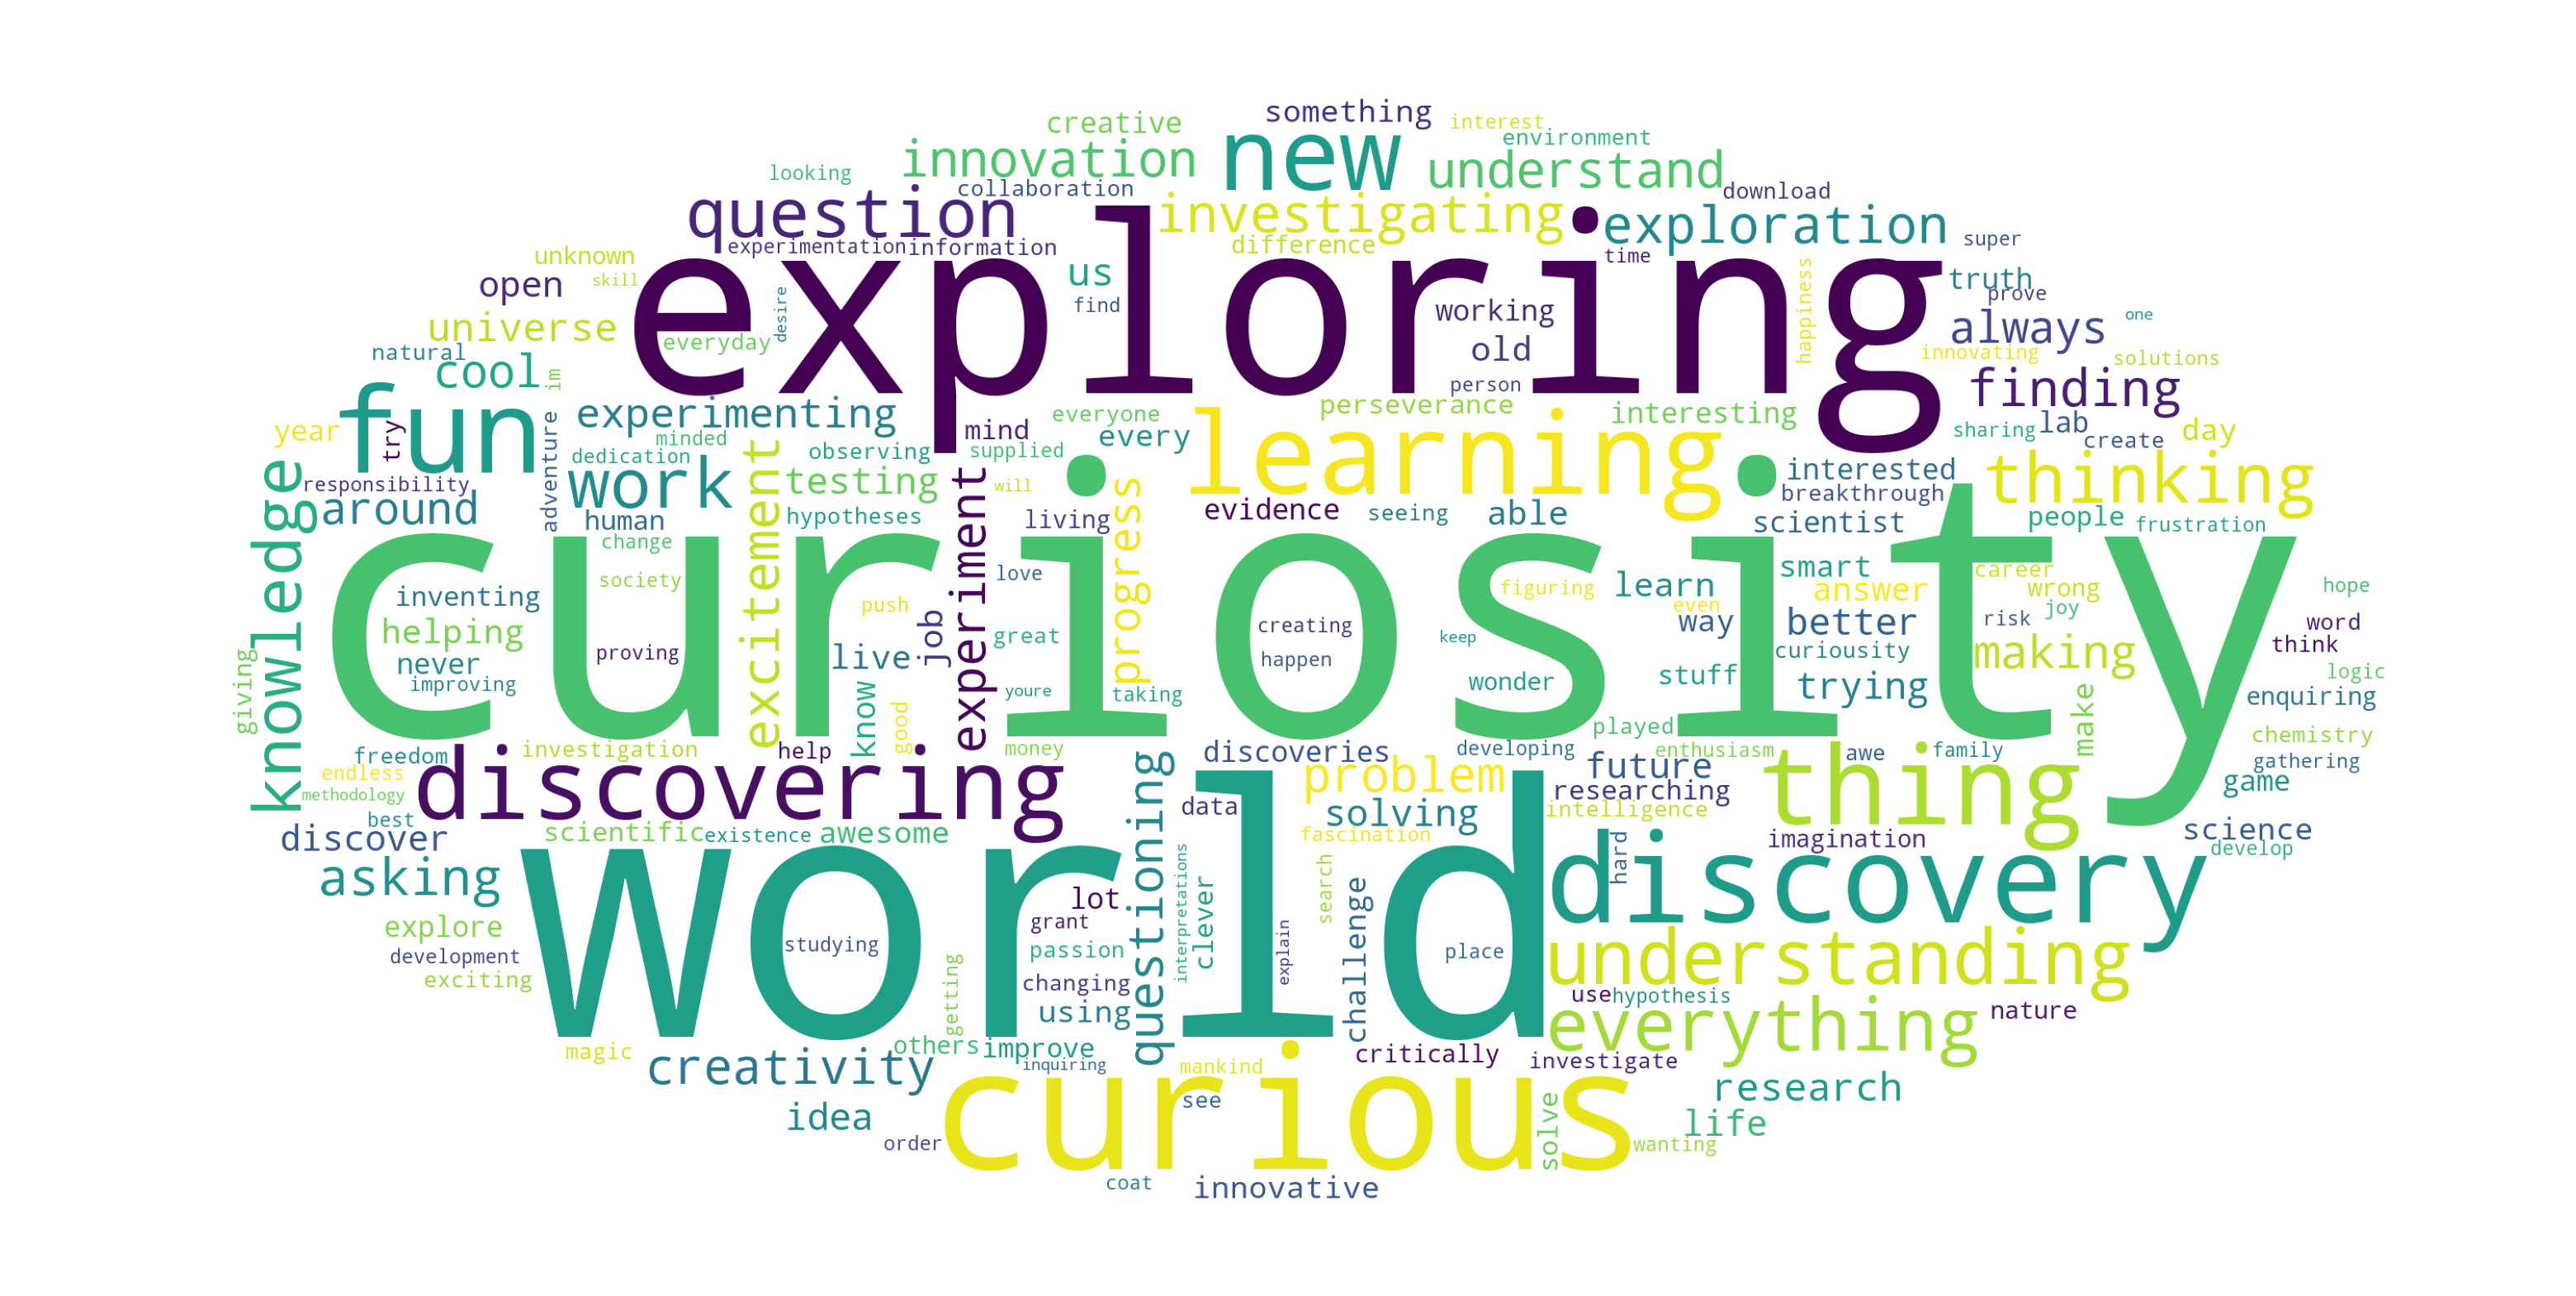

In [19]:
wordcloud.generate(' '.join(pnp_before_words))

plot_cloud(wordcloud)

wordcloud.to_file("figures/pnp_words_before.png")

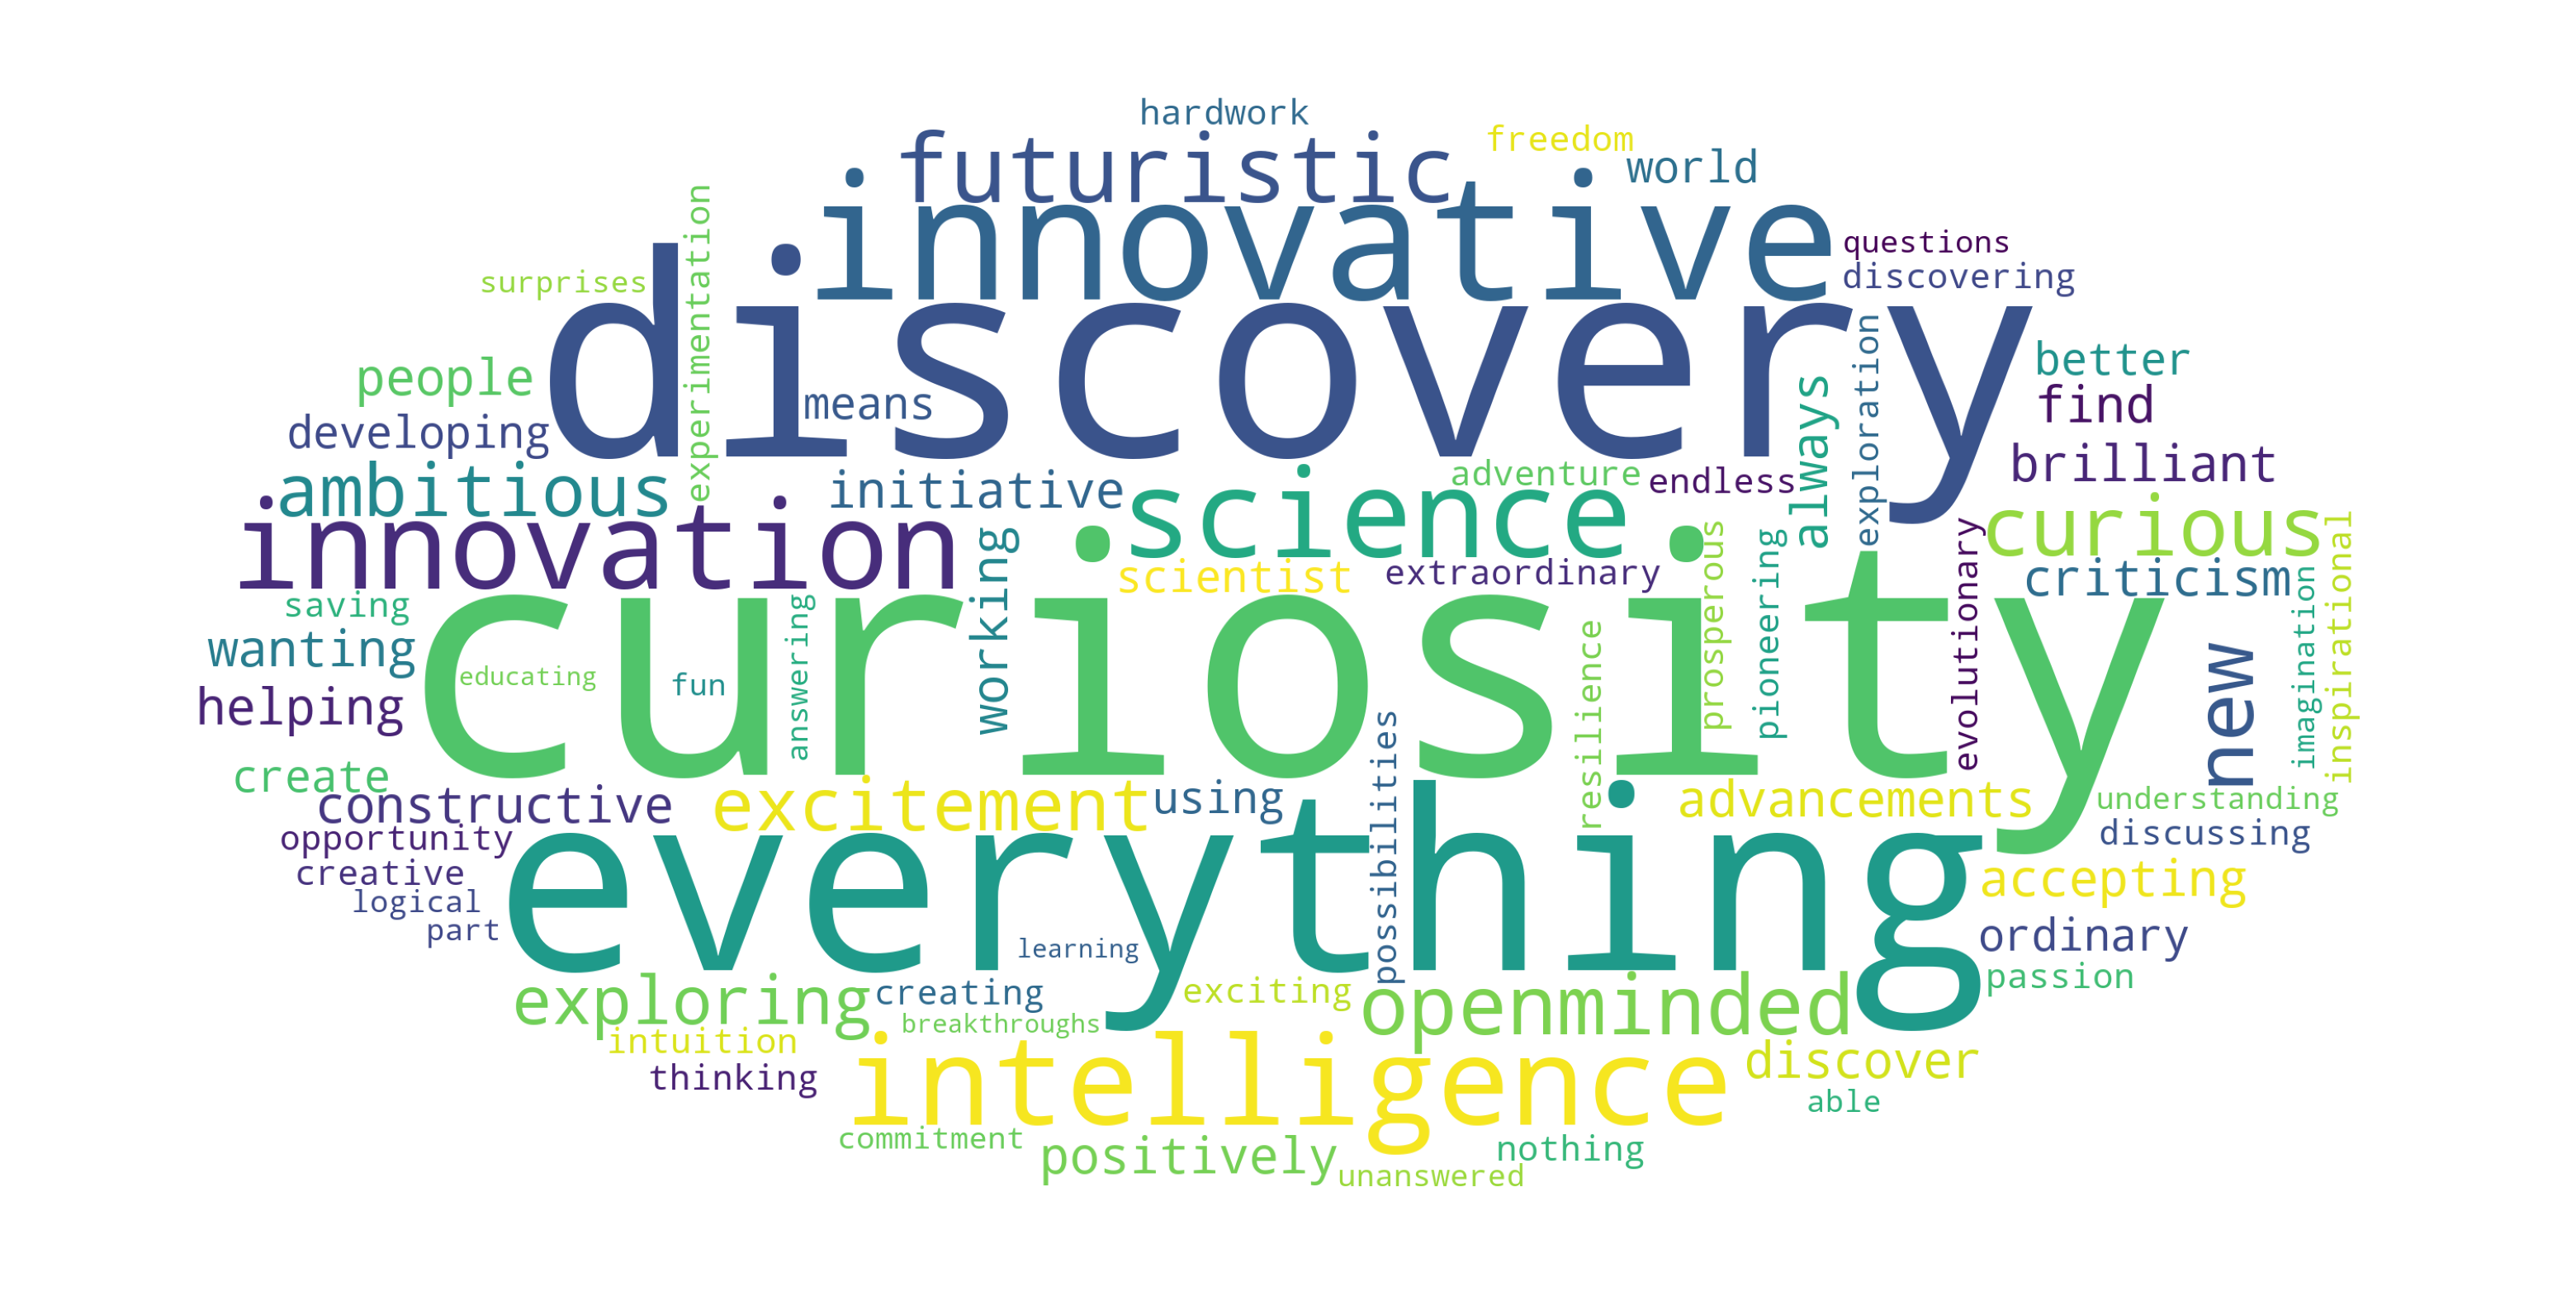

In [17]:
wordcloud.generate(' '.join(smf_before_words))

plot_cloud(wordcloud)

wordcloud.to_file("figures/smf_words_before.png")

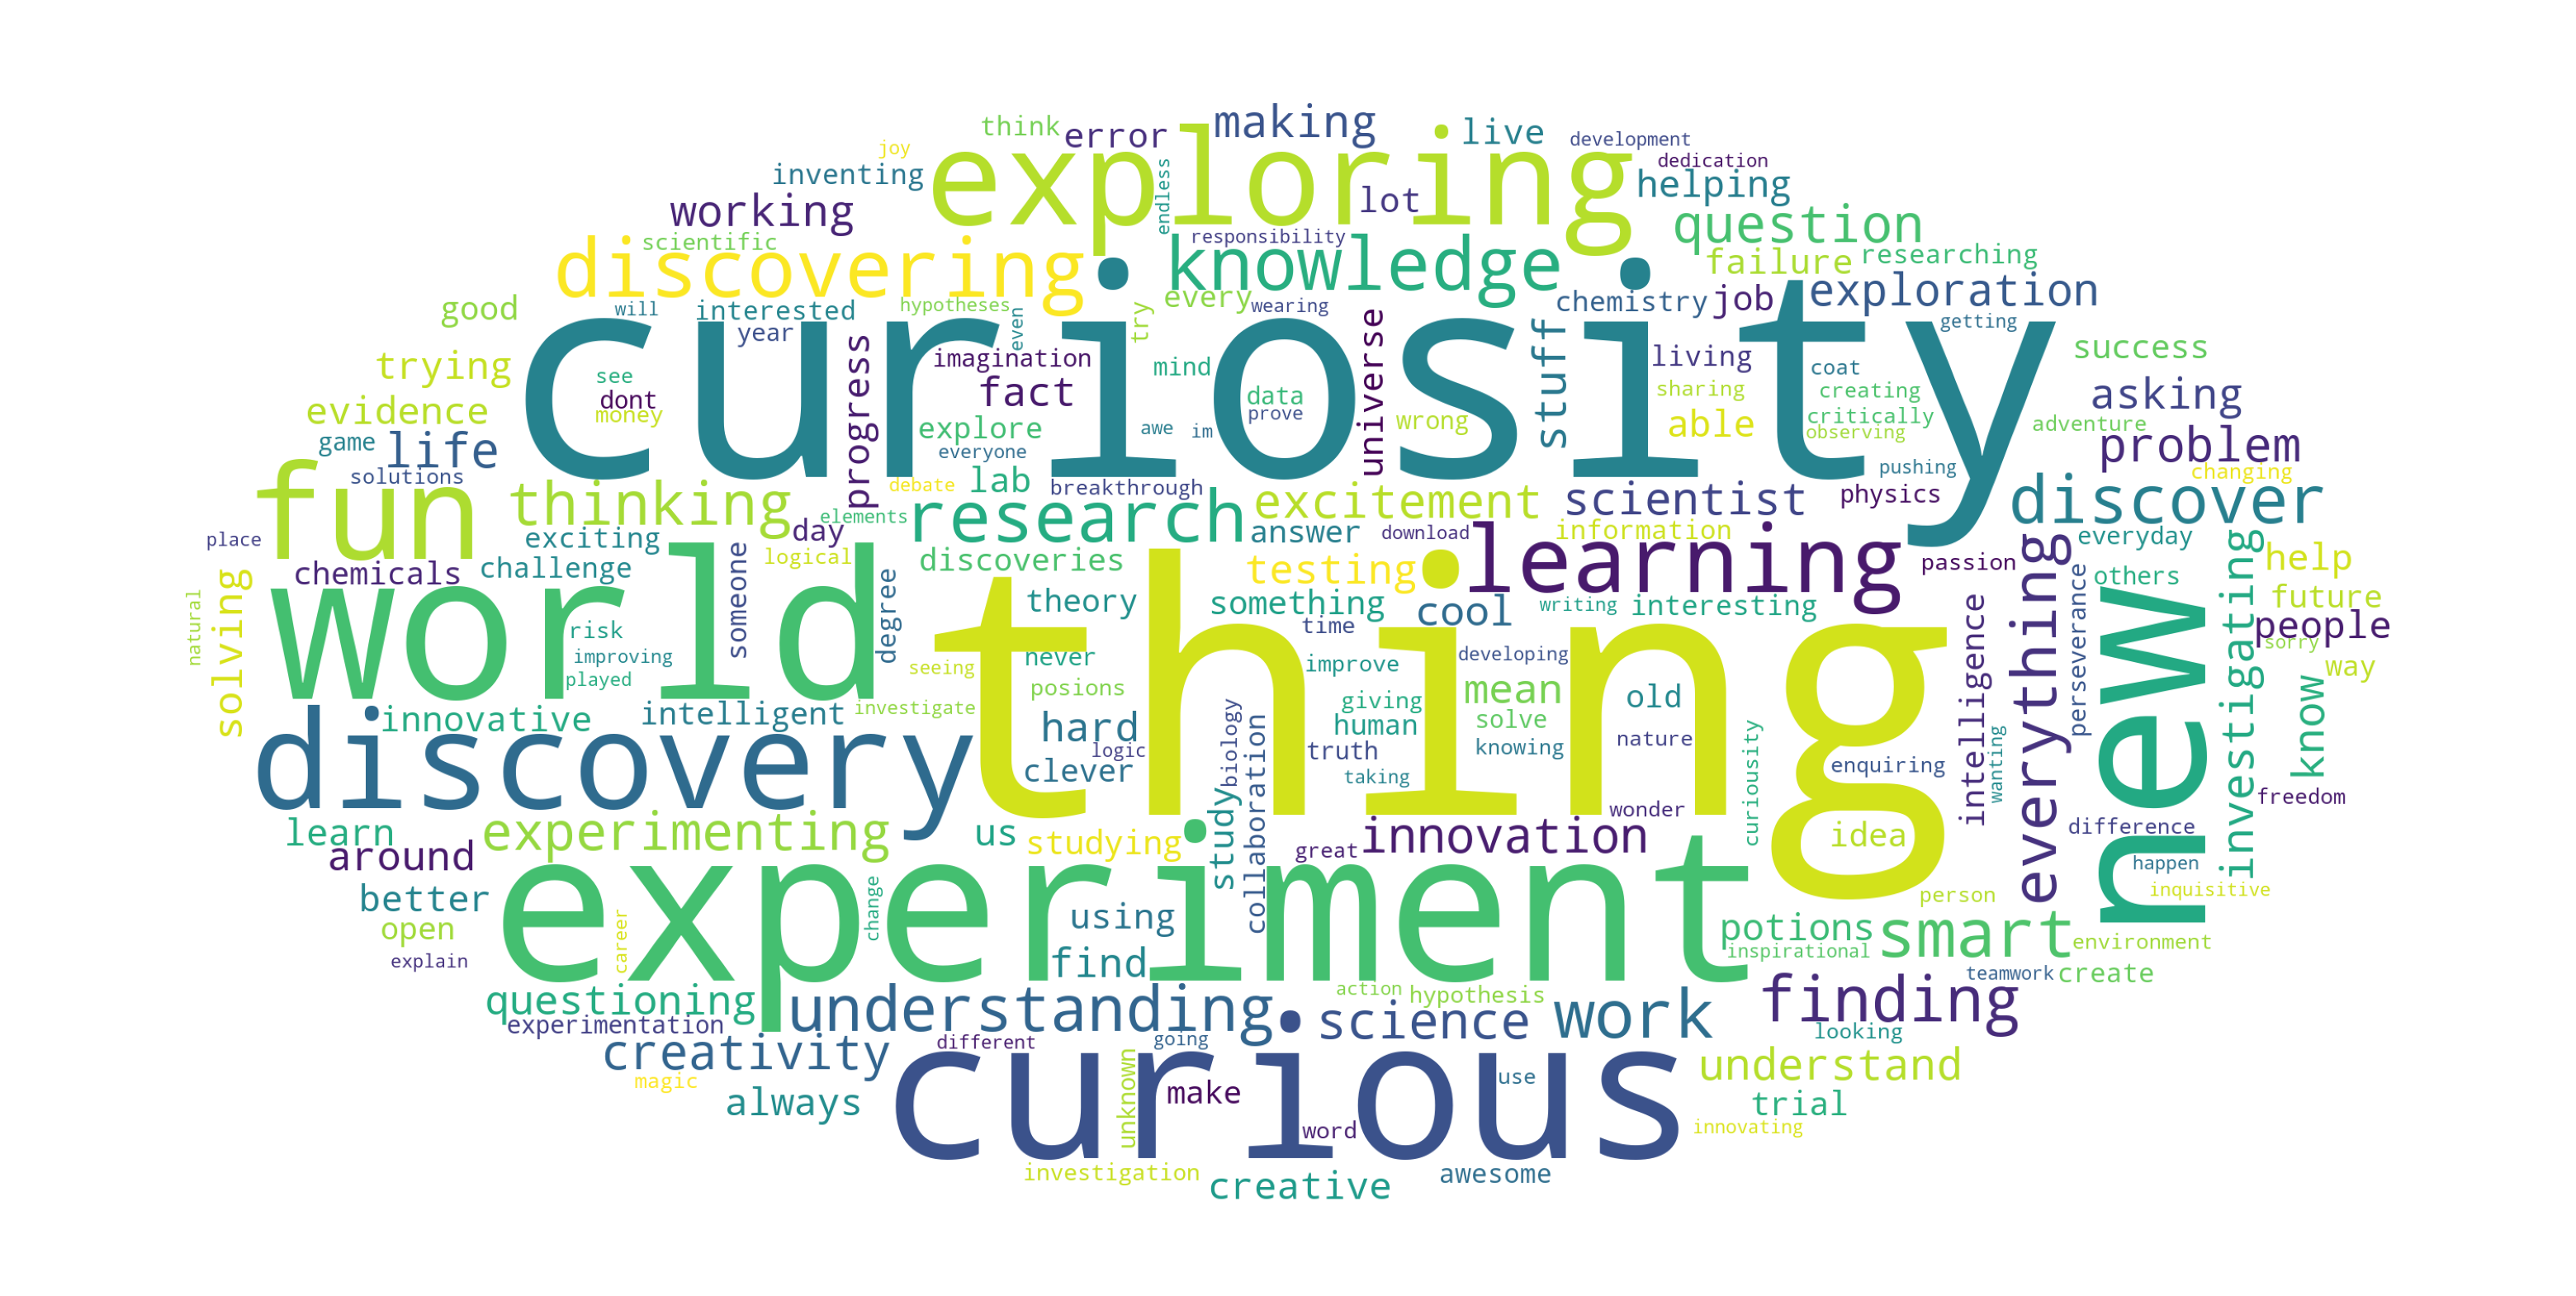

In [20]:
wordcloud.generate(' '.join(smf_before_words+pnp_before_words+rgs_after_words+rgs_before_words+original_after_words+original_before_words))

plot_cloud(wordcloud)

wordcloud.to_file("figures/all_words.png")